# **Install and Import Necessary Libraries**

In [ ]:
!pip install yfinance
import yfinance as yf
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# **Fetch The Cryptocurrency Data**

In [ ]:
# Get the cryptocurrency price data (e.g., Bitcoin)
df = yf.download('BTC-USD', start='2012-01-01', end='2024-11-10')  # BTC-USD for Bitcoin, or change to other cryptocurrency


[*********************100%***********************]  1 of 1 completed


# **Display Data and Shape**

In [ ]:
# Show the data
print(df)

# Get the number of rows and columns in the data set
print(df.shape)

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Date                                                                  
2014-09-17 00:00:00+00:00    457.334015    457.334015    468.174011   
2014-09-18 00:00:00+00:00    424.440002    424.440002    456.859985   
2014-09-19 00:00:00+00:00    394.795990    394.795990    427.834991   
2014-09-20 00:00:00+00:00    408.903992    408.903992    423.295990   
2014-09-21 00:00:00+00:00    398.821014    398.821014    412.425995   
...                                 ...           ...           ...   
2024-10-31 00:00:00+00:00  70215.187500  70215.187500  72662.312500   
2024-11-01 00:00:00+00:00  69482.468750  69482.468750  71559.015625   
2024-11-02 00:00:00+00:00  69289.273438  69289.273438  69867.351562   
2024-11-03 00:00:00+00:00  68741.117188  68741.117188  69361.656250   
2024-11-05 00:00:00+00:00  68548.742188  68548.742188  68702.242188   

Price

# **Visualize the Closing Price**

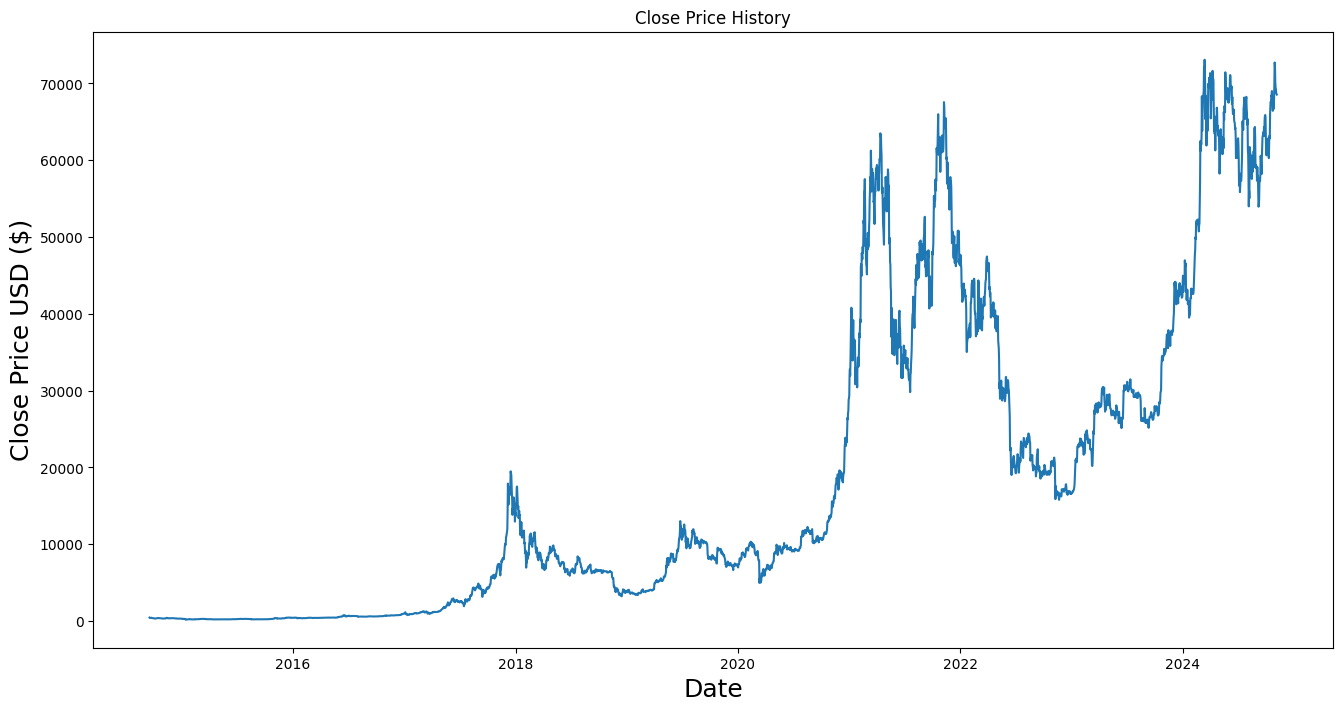

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# **Data Preparation**

In [ ]:
# Create a new dataframe with only the 'Close' column
# Use double brackets to select the column as a DataFrame
data = df[['Close']]

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

2962


# **Scale the Data**

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# **Prepare Training Data**

In [ ]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# **Build the LSTM Model**

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Train the Model**

In [ ]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 4.8791e-04 - val_loss: 0.0036
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 6.2758e-04 - val_loss: 0.0016
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 3.5983e-04 - val_loss: 0.0013
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 3.3229e-04 - val_loss: 0.0028
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - loss: 3.6571e-04 - val_loss: 0.0029
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 2.8586e-04 - val_loss: 0.0012
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 3.4322e-04 - val_loss: 9.6752e-04
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 2.3695e-04 - val_loss: 9.2380e-04
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 2.8209e-04 - val_loss: 0.0025
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 2.6848e-04 - val_loss

# **Prepare Testing Data**

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# **Make predictions and Calculate Error**

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


# Step 9: Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f'Root Mean Squared Error (RMSE): {rmse}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Root Mean Squared Error (RMSE): 1408.7798271725444


# **Visualize Predictions vs Actual**

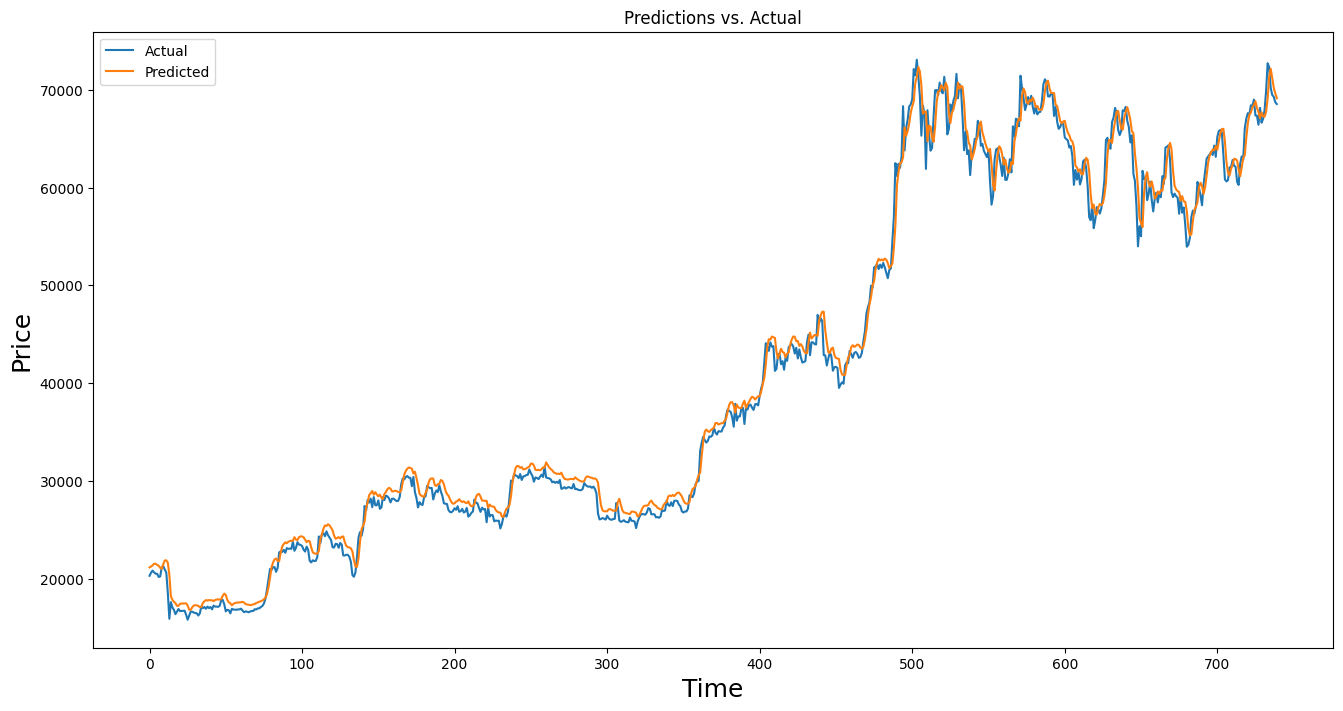

In [ ]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.title('Predictions vs. Actual')
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend()
plt.show()

# **Predict Tomorrow's Price**

In [ ]:
# Predict tomorrow's price
last_60_days = scaled_data[-60:, :]
last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
tomorrow_prediction = model.predict(last_60_days)
tomorrow_prediction = scaler.inverse_transform(tomorrow_prediction)

print("Predicted price for tomorrow:", tomorrow_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted price for tomorrow: 68848.914
